### Importing the necessary libraries

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from IPython.display import clear_output

### Loading the Data

In [88]:
players = pd.read_csv("./players_22.csv")

C:\Users\Sarah\AppData\Local\Temp\ipykernel_6736\4138978669.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("./players_22.csv")


In [89]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


#### Specify the features

In [90]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

#### Drop all rows that have missing values in the specified features

In [91]:
players = players.dropna(subset=features)

#### Copy the data in a new dataframe only with the specified features selected 

In [92]:
data = players[features].copy()

In [93]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


## Feature Scaling

In [94]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [95]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [96]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


## Initializing Random Centroids

In [97]:
def generate_random_centroids(data, k):
    centroids = []
    for i in range(k):
        # takes a random value from each column the the dataframe
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    # combines the centroids pandas series into a pandas dataframe
    return pd.concat(centroids, axis=1)

In [98]:
centroids = generate_random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,2.565217,3.152174,4.913043,3.347826,2.173913
potential,4.913043,5.500000,5.304348,2.956522,8.043478
wage_eur,1.000000,1.012876,1.450644,1.553648,1.424893
value_eur,1.189797,1.012341,1.033218,1.020460,1.087731
age,8.333333,5.333333,7.000000,4.666667,3.333333


In [99]:
def get_labels(data, centroids):
    # Calculating the distance between each centroid and each datapoint 
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    # Setting the clusters based on the min distance
    return distances.idxmin(axis=1)

In [100]:
labels = get_labels(data, centroids)

In [101]:
labels

0        2
1        2
2        2
3        2
4        2
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [102]:
labels.value_counts()

1    6051
2    5806
3    4051
4    3177
0      80
dtype: int64

In [103]:
group = data.groupby(labels)
group.get_group(0)

,overall,potential,wage_eur,value_eur,age
10042,4.521739,4.130435,1.000000,1.003294,9.666667
11057,4.326087,3.934783,1.038627,1.004222,8.666667
11058,4.326087,3.934783,1.003863,1.002366,8.666667
11062,4.326087,3.934783,1.002575,1.008861,8.333333
11063,4.326087,3.934783,1.005150,1.008861,8.333333
...,...,...,...,...,...
17438,2.760870,2.369565,1.006438,1.000278,8.000000
17797,2.565217,2.173913,1.000000,1.000278,7.666667
18137,2.369565,1.978261,1.012876,1.001206,7.666667
18658,1.978261,1.586957,1.000000,1.000278,8.000000


### Recalculating the centroids

By calculating the geometric mean

In [118]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

### Dimensionality Reduction & Plotting the Data

In [125]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

### Initializing Hyperparameters

In [126]:
max_iterations = 100
k = 3

## Plotting data before clustering

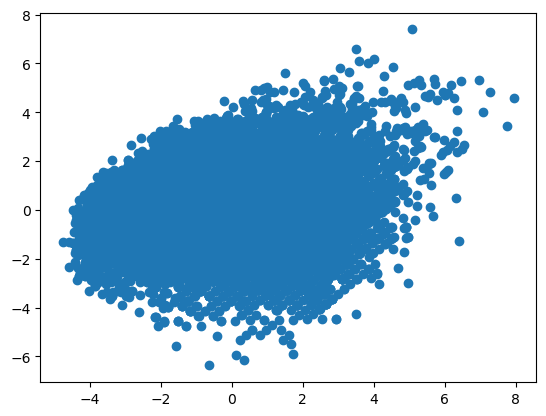

In [127]:
# Plotting the data
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids.T)
clear_output(wait=True)
plt.scatter(x=data_2d[:,0], y=data_2d[:,1])
plt.show()

## Plotting data after clustering

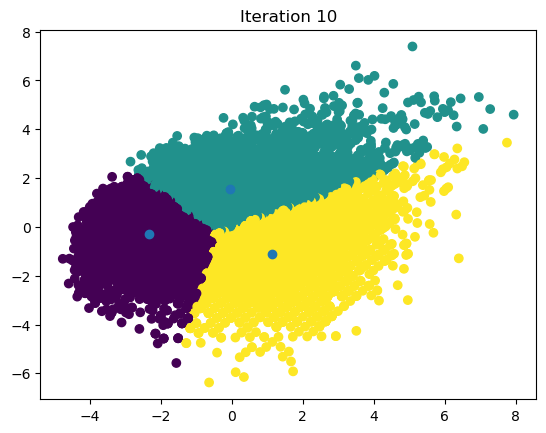

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = generate_random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1